Nama : Ferli Malkan Amien <br>
NPM  : 2117051050 <br>
Kelas: C <br>
Link : https://colab.research.google.com/drive/1SOWQt0gmQOVutIQxGoApCaZXS5cFh56q?usp=sharing

# Pertemuan 6

## Library

In [89]:
import numpy as np
import pandas as pd
# matplotlib untuk visualisasi
import matplotlib.pyplot as plt
# standarscaler untuk preprosing restandar data
from sklearn.preprocessing import StandardScaler
# modeling hirarki clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
# metrics untuk evaluasi
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Load Data

In [90]:
df = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv")
df.head()

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass


In [91]:
# informasi dataframe (jumlah data, jumlah kolom, jumlah baris, tipe data, dll)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   npm                      372 non-null    int64  
 1   activeness_score         372 non-null    int64  
 2   assignment_score         364 non-null    float64
 3   pre_test_score           336 non-null    float64
 4   post_test_score          363 non-null    float64
 5   midterm_test_score       361 non-null    float64
 6   end_semester_test_score  372 non-null    int64  
 7   pass_test                372 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 23.4+ KB


In [92]:
# informasi statistik dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
npm,372.0,2.022041e+09,107.531391,2.022041e+09,2.022041e+09,2.022041e+09,2.022041e+09,2.022041e+09
activeness_score,372.0,9.275806e+01,44.578778,-9.600000e+01,8.500000e+01,9.000000e+01,9.500000e+01,6.660000e+02
assignment_score,364.0,8.532967e+01,8.626380,7.000000e+01,7.900000e+01,8.500000e+01,9.200000e+01,1.000000e+02
pre_test_score,336.0,5.798810e+01,26.472625,1.000000e+01,3.500000e+01,6.150000e+01,8.100000e+01,1.000000e+02
post_test_score,363.0,5.279890e+01,25.691020,1.000000e+01,3.200000e+01,5.100000e+01,7.400000e+01,1.000000e+02
midterm_test_score,361.0,5.339889e+01,24.968789,1.000000e+01,3.200000e+01,5.300000e+01,7.300000e+01,1.000000e+02
end_semester_test_score,372.0,5.333065e+01,30.695107,-9.700000e+01,3.100000e+01,5.250000e+01,7.900000e+01,1.000000e+02


In [93]:
# jumlah NaN / missing values setiap column
df.isna().sum()

npm                         0
activeness_score            0
assignment_score            8
pre_test_score             36
post_test_score             9
midterm_test_score         11
end_semester_test_score     0
pass_test                   0
dtype: int64

## Preprocessing

In [94]:
# hapus daftar outlier
df.loc[df["activeness_score"]<0, "activeness_score"] = np.nan
df.loc[df["activeness_score"]>100, "activeness_score"] = np.nan

In [95]:
# assign missing values dengan mean untuk setiap column yang ada missing nya
df["activeness_score"].fillna(value=df["activeness_score"].mean(), inplace=True)
df["assignment_score"].fillna(value=df["assignment_score"].mean(), inplace=True)
df["pre_test_score"].fillna(value=df["pre_test_score"].mean(), inplace=True)
df["post_test_score"].fillna(value=df["post_test_score"].mean(), inplace=True)
df["midterm_test_score"].fillna(value=df["midterm_test_score"].mean(), inplace=True)

In [96]:
# hapus kolom yang tidak diperlukan
df_clean = df.drop(["npm", "pass_test"], axis=1)

In [97]:
# rescalse data-nya
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df_clean)

## Modeling
Modeling/Training data menggunakan algoritma hierarchical clustering

In [98]:
# lihat pemetaan clustering berdasarkan hirarki dnegna metode divisive
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

In [99]:
# berhubung clustering ini menggunakan pendekatan hirarki, maka digunakan visualisasi untuk lebih mudah pemetaannya
def plot_dendrogram(clusters):
  plt.figure(figsize=(20, 6))
  dendrogram(clusters, orientation="top", leaf_font_size=9, leaf_rotation=360)
  plt.ylabel("Eucliden Distance");

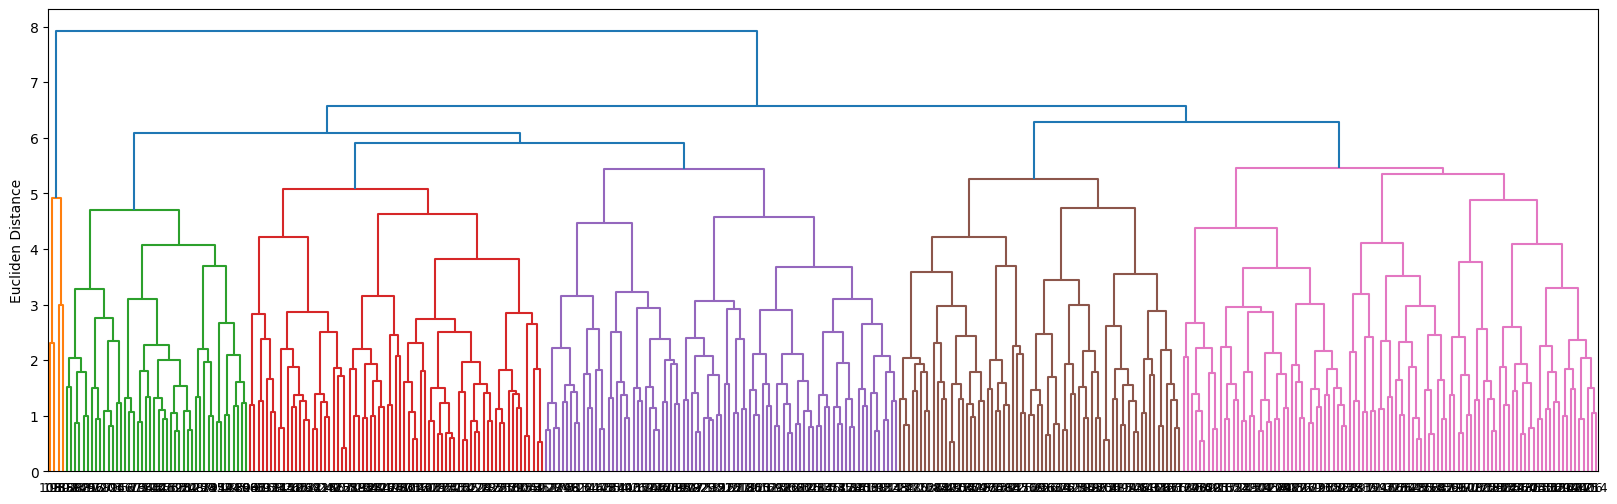

In [100]:
plot_dendrogram(complete_clustering)

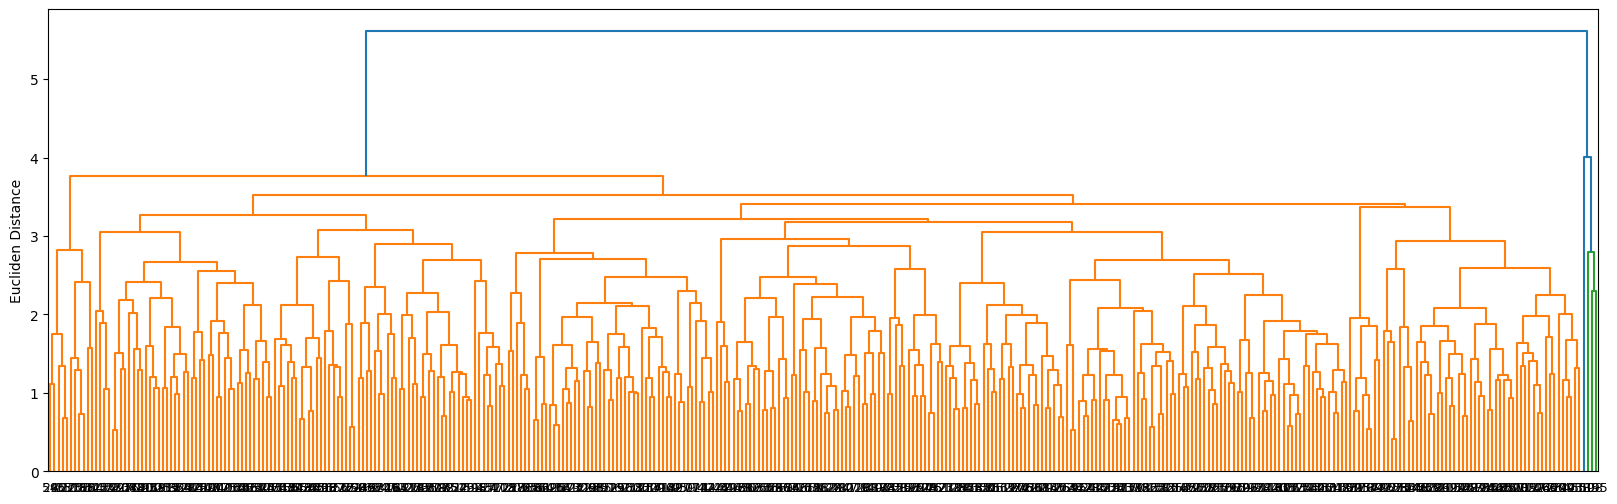

In [101]:
plot_dendrogram(average_clustering)

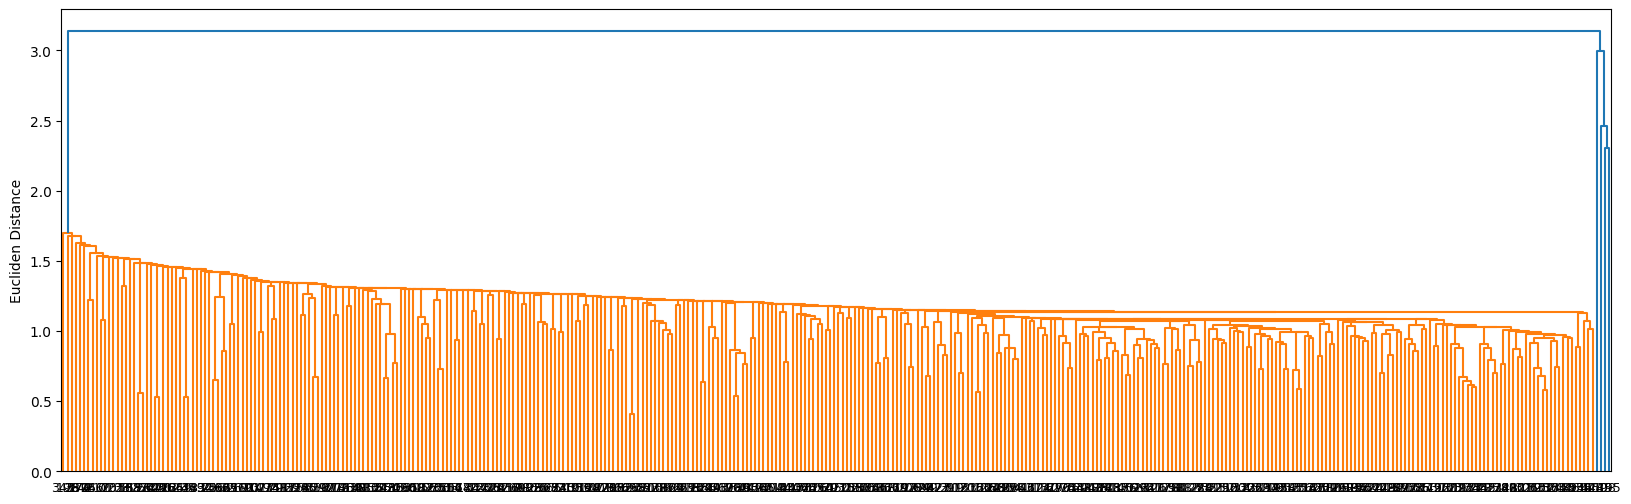

In [102]:
plot_dendrogram(single_clustering)

In [103]:
# predict data cluster bisa menggunakan agglomerative,
# karena sama-sama pendekatan clustering hirarki
# asal parameternya sama dnegna divisive sebelumya
model = AgglomerativeClustering(n_clusters=2, metric="euclidean").fit(df_clean)
#hasil clustering
label = model.labels_

## Evaluation
Evaluasi hasil data clustering menggunakan beberapa metric

In [104]:
Z = df_clean.copy()

In [105]:
# Silhoutte Score dapat digunakan untuk mengevaluasi pemisahan suatu cluster
# Sealin itu matriks ini dapat mengevaluasi apakah cluster overlapping atau tidak
# semakin nilai tersebut mendekati 0, semakin bagus pemisahan cluster
ss = silhouette_score(Z, label)
print(f"Silhoutte score yang didapat adalah: {ss}")

Silhoutte score yang didapat adalah: 0.1472906100582593


In [106]:
# Calinski Harabasz Score dapat digunakan untuk mengevaluasi suatu cluster,
# apakah sudah cukup terpisah dengan baik atau tidak
# semakin besar nilai yang diperoleh, semakin banyak cluster yang dapat dipisahkan
sc = calinski_harabasz_score(Z, label)
print(f"Calonski Harabasz Score yang didapat adalah: {sc}")

Calonski Harabasz Score yang didapat adalah: 64.32213986808439


In [107]:
# Matrik ini dapat digunakan untuk mengevaluasi suatu model cluster,
# apakah sudah menghasil cluster yang bagus atau tidak
# semakin kecil nilai ang diperoleh (mendekati 0), semakin bagus model cluster tersebut
sd = davies_bouldin_score(Z, label)
print(f"Davies Bouldin Score yang didapat adalah: {sd}")

Davies Bouldin Score yang didapat adalah: 2.269267831996057


**Catatan terkait dengan tahapa evaluasi**
Pemilihan metrik untuk evaluasi model didasarkan pada data (karakteristik) dan tipe permasalahan ML (clustering/classification/regression)
Contoh:
-	Untuk permasalahan classficiation, metrik yang digunakan berdasarkan pada confusion matrix
-	Untuk permasalahan regression, metrik yang dapat digunakan antara lain mean squared error (MSE), mean absolute error (MAE), dll
-	Untuk clustering, metrik yang dipilih bisa juga tergantung datanya, jika tidak ada cluster yang sudah dilabeli, maka bisa menggunakan metriks silhouette score, dll, jika ada cluster yang sudah dilabeli bisa menggunakan adjusted rand index dll
Referensi: 
https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6


## Tugas

### Library

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Load Data

In [91]:
df = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv")
df.head()

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass


### Preprocessing

In [92]:
# hapus daftar outlier
df.loc[df["activeness_score"]<0, "activeness_score"] = np.nan
df.loc[df["activeness_score"]>100, "activeness_score"] = np.nan

In [93]:
# assign missing values dengan mean untuk setiap column yang ada missing nya
df["activeness_score"].fillna(value=df["activeness_score"].mean(), inplace=True)
df["assignment_score"].fillna(value=df["assignment_score"].mean(), inplace=True)
df["pre_test_score"].fillna(value=df["pre_test_score"].mean(), inplace=True)
df["post_test_score"].fillna(value=df["post_test_score"].mean(), inplace=True)
df["midterm_test_score"].fillna(value=df["midterm_test_score"].mean(), inplace=True)

In [94]:
df = df.drop("npm", axis=1)
df

,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,99.0,71.00000,93.000000,52.000000,44.0,24,not pass
1,96.0,77.00000,57.988095,27.000000,100.0,89,pass
2,86.0,71.00000,84.000000,17.000000,21.0,41,not pass
3,81.0,96.00000,57.988095,52.798898,11.0,99,not pass
4,93.0,85.00000,68.000000,29.000000,44.0,50,not pass
...,...,...,...,...,...,...,...
367,91.0,85.32967,31.000000,52.000000,31.0,46,not pass
368,96.0,87.00000,55.000000,56.000000,95.0,11,pass
369,90.0,83.00000,89.000000,15.000000,86.0,13,not pass
370,84.0,92.00000,87.000000,97.000000,42.0,27,pass


In [95]:
df["pass_test"] = np.where(df["pass_test"] == "not pass", 0, 1)

df.rename(columns={'pass_test': 'actual_cluster'}, inplace=True)

In [96]:
model = AgglomerativeClustering().fit(df)       
df["predicted_cluster"] = model.labels_

In [97]:
df.head()

,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,actual_cluster,predicted_cluster
0,99.0,71.0,93.000000,52.000000,44.0,24,0,1
1,96.0,77.0,57.988095,27.000000,100.0,89,1,0
2,86.0,71.0,84.000000,17.000000,21.0,41,0,0
3,81.0,96.0,57.988095,52.798898,11.0,99,0,0
4,93.0,85.0,68.000000,29.000000,44.0,50,0,0


### Modeling

In [98]:
model = AgglomerativeClustering(n_clusters=2, metric="euclidean").fit(df)
#hasil clustering
label = model.labels_

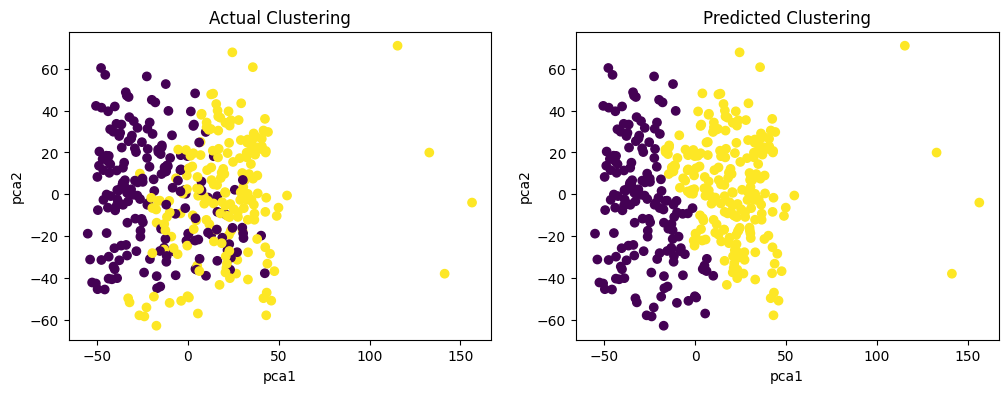

In [99]:
# load data 
X = df.drop("predicted_cluster", axis=1)
y = df["predicted_cluster"]

# lakukan PCA dengan 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# lakukan k-means clustering
model = AgglomerativeClustering(n_clusters=2, linkage="ward", metric="euclidean").fit(X_pca)
y_pred = model.labels_

# plot hasil clustering dengan PCA
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# plot actual clustering
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
axs[0].set_xlabel('pca1')
axs[0].set_ylabel('pca2')
axs[0].set_title('Actual Clustering')

# plot predicted clustering
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
axs[1].set_xlabel('pca1')
axs[1].set_ylabel('pca2')
axs[1].set_title('Predicted Clustering')

plt.show()

### Accuracy Score

In [100]:
scaler = MinMaxScaler()

In [101]:
scaler.fit(X)

MinMaxScaler()

In [102]:
scaled_data = scaler.transform(X)

In [103]:
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)

In [104]:
scaled_data.head().T

,0,1,2,3,4
activeness_score,0.950000,0.800000,0.300000,0.050000,0.650000
assignment_score,0.033333,0.233333,0.033333,0.866667,0.500000
pre_test_score,0.922222,0.533201,0.822222,0.533201,0.644444
post_test_score,0.466667,0.188889,0.077778,0.475543,0.211111
midterm_test_score,0.377778,1.000000,0.122222,0.011111,0.377778
end_semester_test_score,0.614213,0.944162,0.700508,0.994924,0.746193
actual_cluster,0.000000,1.000000,0.000000,0.000000,0.000000


In [105]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=50)

In [106]:
model = linear_model.LogisticRegression()

In [107]:
model.fit(X_train, y_train)

LogisticRegression()

In [108]:
model.score(X_test, y_test)

0.8